In [1]:
import tensorflow as tf

#28x28 pixels of handwritten numbers 0-9
mnist = tf.keras.datasets.mnist

#80% train data, 20% test data
(x_train,y_train), (x_test,y_test)=mnist.load_data()

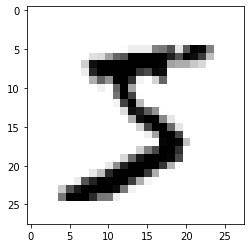

In [2]:
import matplotlib.pyplot as plt

#Display the value
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()
#print(x_train[0]) #shows the pixel array of the image

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

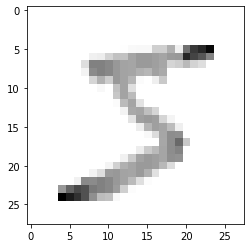

In [3]:
#Normalise the pixel value from 0-255 to 0-1 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0],cmap=plt.cm.binary)
#plt.show()
print(x_train[0]) #shows the pixel array of the image

In [4]:
#Defining the sequential architecture of the CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #number of layers
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #number of outputs 0-9, 10 values

In [5]:
#In a CNN model, the model minimise the loss as much as possible. 
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
#Fitting the model into 3 epochs
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9227
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1060 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0720 - accuracy: 0.9780


In [6]:
#Evaluate the loss of the model

val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1038 - accuracy: 0.9652
0.10380873084068298 0.9652000069618225


In [7]:
#saving the model
model.save('ml_num_reader.model')

INFO:tensorflow:Assets written to: ml_num_reader.model\assets


In [8]:
#loading the saved model
new_model = tf.keras.models.load_model('ml_num_reader.model')

In [9]:
#Predicting the value
predictions = new_model.predict([x_test])
print(predictions)

[[1.41624845e-08 1.31573893e-06 6.10830921e-06 ... 9.99916792e-01
  1.35716249e-07 3.35657751e-06]
 [2.08920281e-09 6.23297121e-04 9.99370039e-01 ... 3.22812088e-09
  3.20687086e-08 5.29754897e-13]
 [3.11171888e-08 9.99948263e-01 3.99706960e-06 ... 2.26892371e-05
  1.48375666e-05 2.70403035e-07]
 ...
 [1.53988182e-08 2.70131932e-06 5.81465486e-07 ... 7.00975361e-05
  3.80724418e-06 6.25881774e-04]
 [1.98362000e-06 8.19682755e-05 4.64151810e-07 ... 2.29197212e-06
  2.33085384e-03 9.49070113e-07]
 [5.34549963e-06 2.02809773e-07 9.48734908e-07 ... 9.01532804e-09
  7.93907418e-07 1.22826469e-08]]


In [10]:
#showing the predicted value
import numpy as np
print(np.argmax(predictions[10]))

0


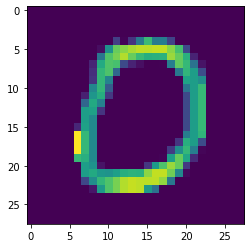

In [11]:
#display the actual value
plt.imshow(x_test[10])
plt.show()